In [ ]:
import numpy as np

def naive_knn(query, data, k=3):
    """
    Naive KNN: Computes the distances between the query point and all points in the dataset.

    Parameters:
        query: The query point (1D numpy array).
        data: Dataset of points (2D numpy array, shape: [n_samples, n_features]).
        k: Number of neighbors to find.

    Returns:
        Indices of the k-nearest neighbors and their distances.
    """
    distances = np.linalg.norm(data - query, axis=1)  # Euclidean distance
    nearest_neighbors = np.argsort(distances)[:k]    # Indices of the k smallest distances
    return nearest_neighbors, distances[nearest_neighbors]


In [ ]:
from scipy.spatial import KDTree

def kd_tree_knn(query, data, k=3):
    """
    KNN using KD-tree for efficient search.

    Parameters:
        query: The query point (1D numpy array).
        data: Dataset of points (2D numpy array, shape: [n_samples, n_features]).
        k: Number of neighbors to find.

    Returns:
        Indices of the k-nearest neighbors and their distances.
    """
    tree = KDTree(data)  # Build KD-tree
    distances, indices = tree.query(query, k)  # Query the tree for k-nearest neighbors
    return indices, distances


In [ ]:
from sklearn.neighbors import NearestNeighbors

def lsh_knn(query, data, k=3, n_hashes=10):
    """
    Approximate KNN using Locality-Sensitive Hashing (LSH).

    Parameters:
        query: The query point (1D numpy array).
        data: Dataset of points (2D numpy array, shape: [n_samples, n_features]).
        k: Number of neighbors to find.
        n_hashes: Number of hash functions (affects approximation quality).

    Returns:
        Indices of the k-nearest neighbors and their distances.
    """
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto', n_jobs=-1)
    lsh.fit(data)  # Fit LSH model on data
    distances, indices = lsh.kneighbors(query.reshape(1, -1), n_neighbors=k)
    return indices.flatten(), distances.flatten()


In [ ]:
from sklearn.datasets import make_blobs

data, _ = make_blobs(n_samples=1000, n_features=3, centers=5, random_state=42)
query_point = np.array([0.5, -1.0, 2.0])


In [ ]:
k = 5

# Naive
naive_indices, naive_distances = naive_knn(query_point, data, k)
print("Naive KNN:", naive_indices)

# KD-tree
kd_indices, kd_distances = kd_tree_knn(query_point, data, k)
print("KD-tree KNN:", kd_indices)

# LSH
lsh_indices, lsh_distances = lsh_knn(query_point, data, k)
print("LSH KNN:", lsh_indices)


Naive KNN: [915 146  81 423 526]
KD-tree KNN: [915 146  81 423 526]
LSH KNN: [915 146  81 423 526]


In [ ]:
import time

start = time.time()
naive_knn(query_point, data, k)
print("Naive KNN Time:", time.time() - start)

start = time.time()
kd_tree_knn(query_point, data, k)
print("KD-tree Time:", time.time() - start)

start = time.time()
lsh_knn(query_point, data, k)
print("LSH Time:", time.time() - start)


Naive KNN Time: 0.0035593509674072266
KD-tree Time: 0.0035619735717773438
LSH Time: 0.026510238647460938


In [ ]:
!pip install memory_profiler

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from memory_profiler import memory_usage

def evaluate_knn_performance(N, D, k):
    """
    Evaluate time and memory for Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.

    Parameters:
        N: Number of data points.
        D: Number of dimensions.
        k: Number of neighbors to find.
    """
    data = np.random.rand(N, D)  # Random dataset
    query = np.random.rand(1, D)  # Single query point

    # Naive KNN
    start = time.time()
    naive_distances = np.linalg.norm(data - query, axis=1)
    naive_indices = np.argsort(naive_distances)[:k]
    naive_time = time.time() - start

    # KD-tree
    start = time.time()
    kd_tree = KDTree(data)
    kd_tree.query(query, k)
    kd_time = time.time() - start

    # LSH
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto', n_jobs=-1)
    lsh.fit(data)
    lsh.kneighbors(query, n_neighbors=k)
    lsh_time = time.time() - start

    print(f"N={N}, D={D}, k={k}")
    print(f"Naive Time: {naive_time:.6f}s, KD-tree Time: {kd_time:.6f}s, LSH Time: {lsh_time:.6f}s")

# Example usage
for N in [100, 1000, 10000]:
    for D in [2, 10, 50]:
        evaluate_knn_performance(N, D, k=5)


N=100, D=2, k=5
Naive Time: 0.000114s, KD-tree Time: 0.000577s, LSH Time: 0.013684s
N=100, D=10, k=5
Naive Time: 0.000095s, KD-tree Time: 0.000475s, LSH Time: 0.013404s
N=100, D=50, k=5
Naive Time: 0.000103s, KD-tree Time: 0.000612s, LSH Time: 0.053626s
N=1000, D=2, k=5
Naive Time: 0.000225s, KD-tree Time: 0.000672s, LSH Time: 0.013806s
N=1000, D=10, k=5
Naive Time: 0.000247s, KD-tree Time: 0.001184s, LSH Time: 0.014237s
N=1000, D=50, k=5
Naive Time: 0.001058s, KD-tree Time: 0.003649s, LSH Time: 0.001229s
N=10000, D=2, k=5
Naive Time: 0.001360s, KD-tree Time: 0.003988s, LSH Time: 0.017525s
N=10000, D=10, k=5
Naive Time: 0.002538s, KD-tree Time: 0.011456s, LSH Time: 0.025715s
N=10000, D=50, k=5
Naive Time: 0.008062s, KD-tree Time: 0.057433s, LSH Time: 0.002997s


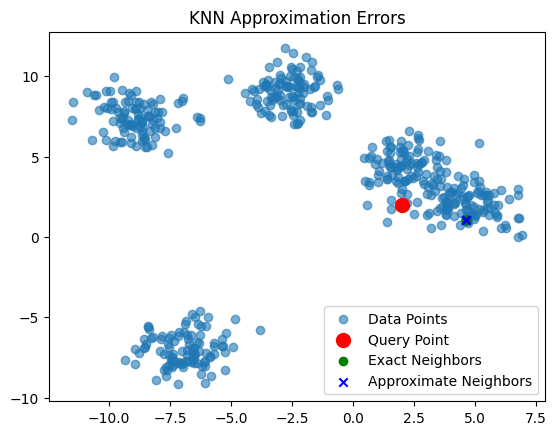

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KDTree, NearestNeighbors
import numpy as np

# Generate 2D Dataset
N = 500
data, _ = make_blobs(n_samples=N, centers=5, n_features=2, random_state=42)
query = np.array([2, 2])  # A sample query point

# Exact (KD-tree)
kd_tree = KDTree(data)
exact_indices, _ = kd_tree.query(query.reshape(1, -1), k=5)

# Approximate (LSH)
lsh = NearestNeighbors(n_neighbors=5, algorithm='auto')
lsh.fit(data)
approx_indices, _ = lsh.kneighbors(query.reshape(1, -1), n_neighbors=5)

# Ensure indices are integers
exact_indices = exact_indices.astype(int)
approx_indices = approx_indices.astype(int)

# Visualization
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label="Data Points")
plt.scatter(query[0], query[1], color='red', label="Query Point", s=100)
plt.scatter(data[exact_indices[0], 0], data[exact_indices[0], 1], color='green', label="Exact Neighbors")
plt.scatter(data[approx_indices[0], 0], data[approx_indices[0], 1], color='blue', label="Approximate Neighbors", marker='x')

# Highlight missed neighbors
missed = set(exact_indices[0]) - set(approx_indices[0])
for idx in missed:
    plt.scatter(data[idx, 0], data[idx, 1], color='purple', label="Missed Neighbors", marker='P')

plt.legend()
plt.title("KNN Approximation Errors")
plt.show()


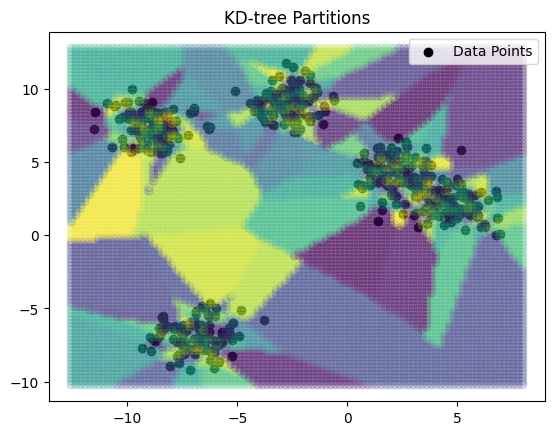

In [ ]:
def visualize_kdtree(data):
    kd_tree = KDTree(data)

    # Generate grid for visualization
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Query all grid points
    _, indices = kd_tree.query(grid_points, k=1)

    # Colorize partitions based on nearest neighbor
    plt.scatter(data[:, 0], data[:, 1], c='black', label="Data Points")
    plt.scatter(grid_points[:, 0], grid_points[:, 1], c=indices, cmap='viridis', alpha=0.2)
    plt.title("KD-tree Partitions")
    plt.legend()
    plt.show()

# Example Usage
visualize_kdtree(data)


In [1]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
from sklearn.datasets import make_blobs


def naive_knn(data, query, k):
    """Naive KNN using pairwise distances."""
    dists = distance.cdist(query, data, metric='euclidean')
    indices = np.argsort(dists, axis=1)[:, :k]
    return indices


def evaluate_knn_methods(N, D, k):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.

    Parameters:
        N: Number of data points.
        D: Number of dimensions.
        k: Number of neighbors to find.
    """
    data = np.random.rand(N, D)  # Random dataset
    query = np.random.rand(1, D)  # Single query point

    results = {}

    # Naive KNN
    start = time.time()
    naive_indices = naive_knn(data, query, k)
    results['naive_time'] = time.time() - start

    # KD-tree
    start = time.time()
    kd_tree = KDTree(data)
    kd_indices, _ = kd_tree.query(query, k)
    results['kd_time'] = time.time() - start

    # LSH
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    lsh.fit(data)
    lsh_indices = lsh.kneighbors(query, return_distance=False)
    results['lsh_time'] = time.time() - start

    results['naive_indices'] = naive_indices
    results['kd_indices'] = kd_indices
    results['lsh_indices'] = lsh_indices

    return results


# Vary dataset size and dimensions
for N in [100, 1000, 5000]:
    for D in [2, 10, 50]:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k=5)
        print(f"Naive Time: {results['naive_time']:.6f}s, KD-tree Time: {results['kd_time']:.6f}s, LSH Time: {results['lsh_time']:.6f}s")

def visualize_2d_approximation_errors():
    # Generate 2D dataset
    data, _ = make_blobs(n_samples=500, centers=5, n_features=2, random_state=42)
    query = np.array([2, 2])  # Query point

    # Exact (KD-tree)
    kd_tree = KDTree(data)
    exact_indices, _ = kd_tree.query(query.reshape(1, -1), k=5)
    exact_indices = exact_indices.astype(int)  # Ensure integer indices

    # Approximate (LSH)
    lsh = NearestNeighbors(n_neighbors=5, algorithm='auto')
    lsh.fit(data)
    approx_indices = lsh.kneighbors(query.reshape(1, -1), return_distance=False)
    approx_indices = approx_indices.astype(int)  # Ensure integer indices

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label="Data Points")
    plt.scatter(query[0], query[1], color='red', label="Query Point", s=100)
    plt.scatter(data[exact_indices[0], 0], data[exact_indices[0], 1], color='green', label="Exact Neighbors")
    plt.scatter(data[approx_indices[0], 0], data[approx_indices[0], 1], color='blue', label="Approximate Neighbors", marker='x')

    # Highlight missed neighbors
    missed = set(exact_indices[0]) - set(approx_indices[0])
    for idx in missed:
        plt.scatter(data[idx, 0], data[idx, 1], color='purple', label="Missed Neighbors", marker='P')

    plt.legend()
    plt.title("KNN Approximation Errors")
    plt.show()


def visualize_knn_approximation(data, query, method_name, indices, exact_indices):
    """Visualize the KNN results for a specific method."""
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label="Data Points")
    plt.scatter(query[0], query[1], color='red', label="Query Point", s=100)
    plt.scatter(data[exact_indices[0], 0], data[exact_indices[0], 1], color='green', label="Exact Neighbors")
    plt.scatter(data[indices[0], 0], data[indices[0], 1], color='blue', label=f"{method_name} Neighbors", marker='x')

    # Highlight missed neighbors
    missed = set(exact_indices[0]) - set(indices[0])
    for idx in missed:
        plt.scatter(data[idx, 0], data[idx, 1], color='purple', label="Missed Neighbors", marker='P')

    plt.legend()
    plt.title(f"KNN Approximation Errors - {method_name}")
    plt.show()

# Generate 2D dataset
data, _ = make_blobs(n_samples=500, centers=5, n_features=2, random_state=42)
query = np.array([2, 2]).reshape(1, -1)

# Exact neighbors using KD-tree (benchmark)
kd_tree = KDTree(data)
exact_indices, _ = kd_tree.query(query, k=5)
exact_indices = exact_indices.astype(int)

# Naive KNN visualization
naive_indices = naive_knn(data, query, k=5)
visualize_knn_approximation(data, query.flatten(), "Naive", naive_indices, exact_indices)

# KD-tree visualization
kd_indices, _ = kd_tree.query(query, k=5)
visualize_knn_approximation(data, query.flatten(), "KD-tree", kd_indices, exact_indices)

# LSH (using NearestNeighbors)
lsh = NearestNeighbors(n_neighbors=5, algorithm='auto')
lsh.fit(data)
lsh_indices = lsh.kneighbors(query, return_distance=False)
visualize_knn_approximation(data, query.flatten(), "LSH", lsh_indices, exact_indices)



# Run visualizations
visualize_2d_approximation_errors()

data, _ = make_blobs(n_samples=500, centers=5, n_features=2, random_state=42)
visualize_kdtree_partitions(data)


ModuleNotFoundError: No module named 'memory_profiler'

In [2]:
!pip install memory_profiler

Evaluating for N=100, D=2
Evaluating for N=100, D=10
Evaluating for N=100, D=50
Evaluating for N=1000, D=2
Evaluating for N=1000, D=10
Evaluating for N=1000, D=50
Evaluating for N=500000, D=2
Evaluating for N=500000, D=10
Evaluating for N=500000, D=50


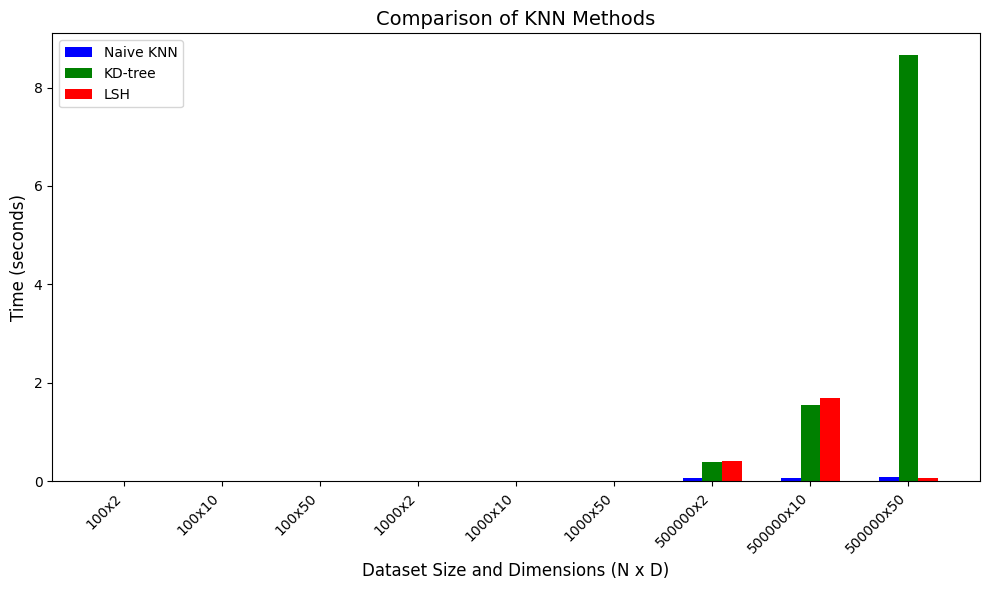

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance

def naive_knn(data, query, k):
    """Naive KNN using pairwise distances."""
    dists = distance.cdist(query, data, metric='euclidean')
    indices = np.argsort(dists, axis=1)[:, :k]
    return indices

def evaluate_knn_methods(N, D, k):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.

    Parameters:
        N: Number of data points.
        D: Number of dimensions.
        k: Number of neighbors to find.
    """
    data = np.random.rand(N, D)  # Random dataset
    query = np.random.rand(1, D)  # Single query point

    results = {}

    # Naive KNN
    start = time.time()
    naive_indices = naive_knn(data, query, k)
    results['naive_time'] = time.time() - start

    # KD-tree
    start = time.time()
    kd_tree = KDTree(data)
    kd_indices, _ = kd_tree.query(query, k)
    results['kd_time'] = time.time() - start

    # LSH
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    lsh.fit(data)
    lsh_indices = lsh.kneighbors(query, return_distance=False)
    results['lsh_time'] = time.time() - start

    results['naive_indices'] = naive_indices
    results['kd_indices'] = kd_indices
    results['lsh_indices'] = lsh_indices

    return results

# Prepare data for plotting
N_values = [100, 1000, 500000]
D_values = [2, 10, 50]
k = 5

naive_times = []
kd_times = []
lsh_times = []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k)

        naive_times.append(results['naive_time'])
        kd_times.append(results['kd_time'])
        lsh_times.append(results['lsh_time'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create a grouped bar plot
width = 0.2  # Width of the bars
x = np.arange(len(naive_times))  # X axis positions

ax.bar(x - width, naive_times, width, label='Naive KNN', color='blue')
ax.bar(x, kd_times, width, label='KD-tree', color='green')
ax.bar(x + width, lsh_times, width, label='LSH', color='red')

# Customize plot
ax.set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=12)
ax.set_ylabel('Time (seconds)', fontsize=12)
ax.set_title('Comparison of KNN Methods', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


Evaluating for N=100, D=2
Evaluating for N=100, D=10
Evaluating for N=100, D=50
Evaluating for N=1000, D=2
Evaluating for N=1000, D=10
Evaluating for N=1000, D=50
Evaluating for N=5000, D=2
Evaluating for N=5000, D=10
Evaluating for N=5000, D=50


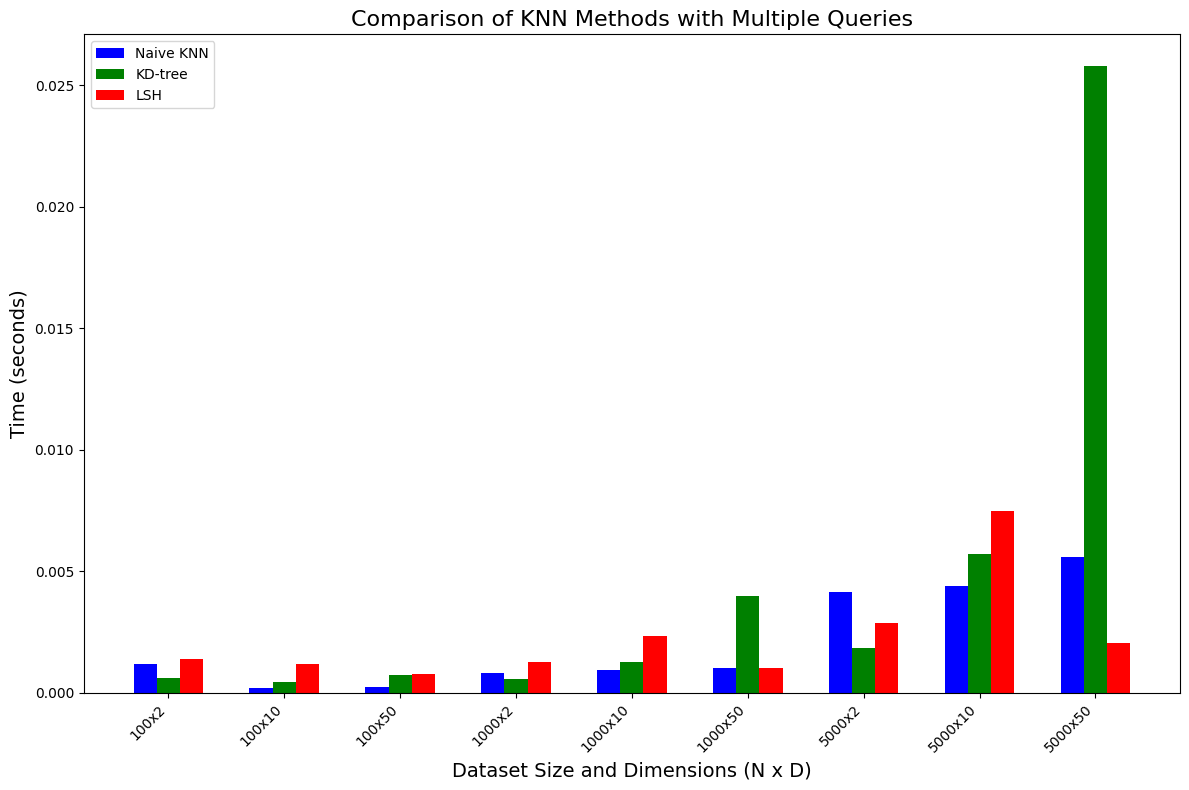

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance

def naive_knn(data, query, k):
    """Naive KNN using pairwise distances."""
    dists = distance.cdist(query, data, metric='euclidean')
    indices = np.argsort(dists, axis=1)[:, :k]
    return indices

def evaluate_knn_methods(N, D, k, num_queries=10):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.

    Parameters:
        N: Number of data points.
        D: Number of dimensions.
        k: Number of neighbors to find.
        num_queries: Number of queries to run.
    """
    data = np.random.rand(N, D)  # Random dataset
    queries = np.random.rand(num_queries, D)  # Multiple query points

    results = {}

    # Naive KNN
    start = time.time()
    naive_indices = np.array([naive_knn(data, q.reshape(1, -1), k) for q in queries])
    results['naive_time'] = time.time() - start

    # KD-tree
    start = time.time()
    kd_tree = KDTree(data)
    kd_indices, _ = kd_tree.query(queries, k)
    results['kd_time'] = time.time() - start

    # LSH
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    lsh.fit(data)
    lsh_indices = lsh.kneighbors(queries, return_distance=False)
    results['lsh_time'] = time.time() - start

    results['naive_indices'] = naive_indices
    results['kd_indices'] = kd_indices
    results['lsh_indices'] = lsh_indices

    return results

# Prepare data for plotting
N_values = [100, 1000, 5000]
D_values = [2, 10, 50]
k = 5

naive_times = []
kd_times = []
lsh_times = []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k, num_queries=10)

        naive_times.append(results['naive_time'])
        kd_times.append(results['kd_time'])
        lsh_times.append(results['lsh_time'])

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Create a grouped bar plot
width = 0.2  # Width of the bars
x = np.arange(len(naive_times))  # X axis positions

ax.bar(x - width, naive_times, width, label='Naive KNN', color='blue')
ax.bar(x, kd_times, width, label='KD-tree', color='green')
ax.bar(x + width, lsh_times, width, label='LSH', color='red')

# Customize plot
ax.set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax.set_ylabel('Time (seconds)', fontsize=14)
ax.set_title('Comparison of KNN Methods with Multiple Queries', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


Evaluating for N=100, D=2
Evaluating for N=100, D=10
Evaluating for N=100, D=50
Evaluating for N=1000, D=2
Evaluating for N=1000, D=10
Evaluating for N=1000, D=50
Evaluating for N=5000, D=2
Evaluating for N=5000, D=10
Evaluating for N=5000, D=50


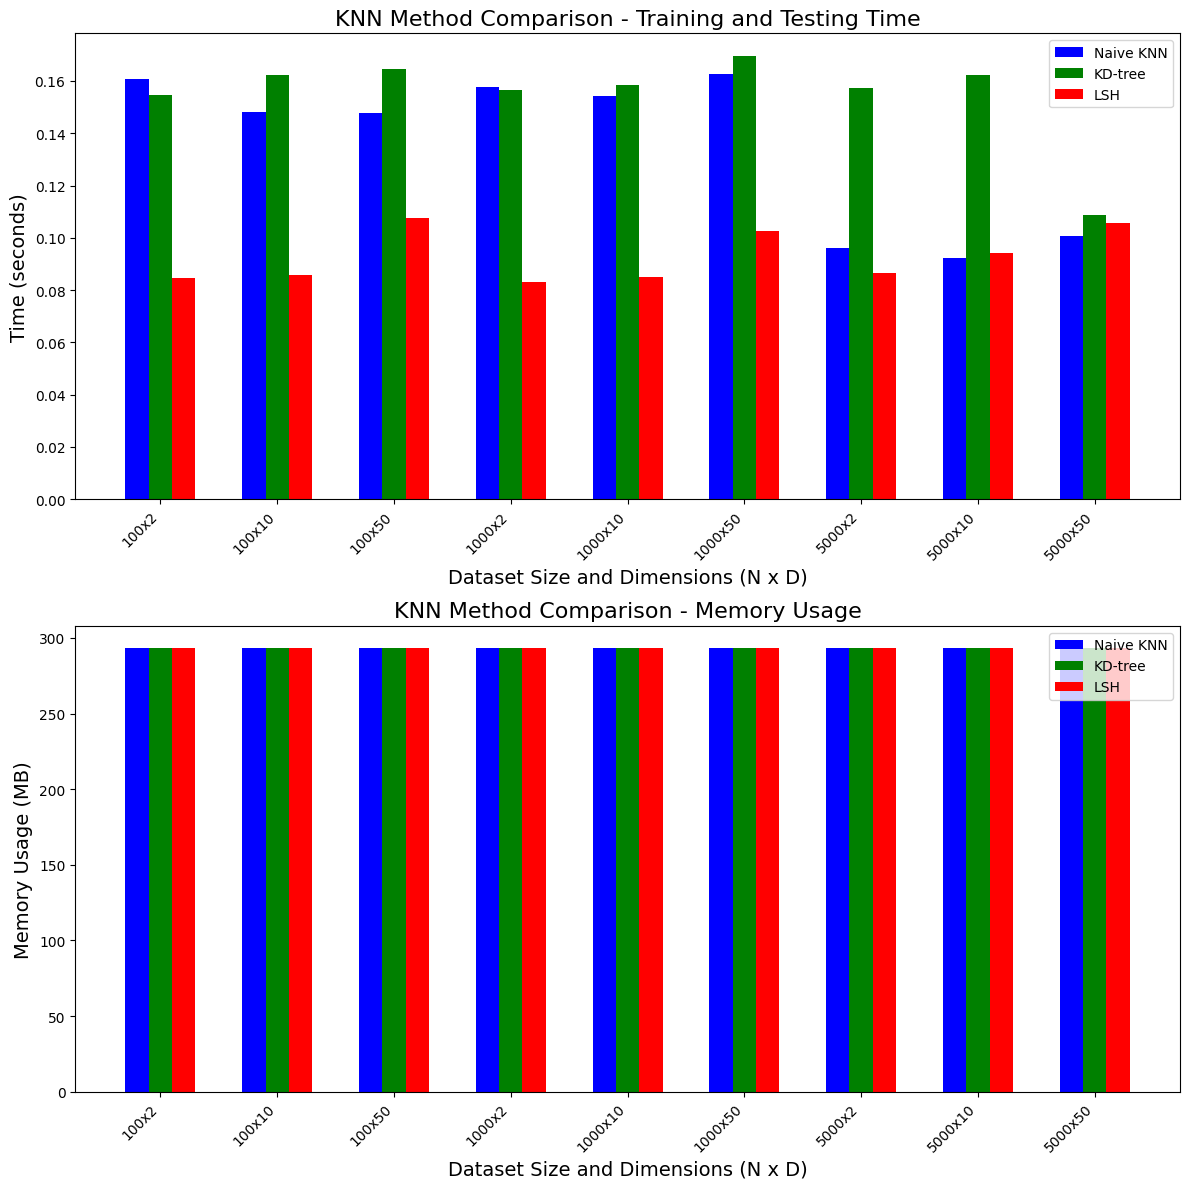

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

def naive_knn(data, query, k):
    """Naive KNN using pairwise distances."""
    dists = distance.cdist(query, data, metric='euclidean')
    indices = np.argsort(dists, axis=1)[:, :k]
    return indices

def evaluate_knn_methods(N, D, k, num_queries=10):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.
    Additionally, measure memory usage during training and testing.
    """
    data = np.random.rand(N, D)  # Random dataset
    queries = np.random.rand(num_queries, D)  # Multiple query points

    # Function to track memory usage during a specific block of code
    def memory_function(func, *args, **kwargs):
        # Get memory usage as a list and return the maximum value
        mem_usage = memory_usage(proc=(func, args, kwargs))
        return max(mem_usage)  # Get the maximum memory usage from the list

    results = {}

    # Naive KNN
    start = time.time()
    naive_mem = memory_function(naive_knn, data, queries, k)
    results['naive_time'] = time.time() - start
    results['naive_mem'] = naive_mem  # Directly store the memory usage value

    # KD-tree
    start = time.time()
    kd_tree = KDTree(data)
    kd_mem = memory_function(kd_tree.query, queries, k)
    results['kd_time'] = time.time() - start
    results['kd_mem'] = kd_mem  # Directly store the memory usage value

    # LSH
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    lsh.fit(data)
    lsh_mem = memory_function(lsh.kneighbors, queries, return_distance=False)
    results['lsh_time'] = time.time() - start
    results['lsh_mem'] = lsh_mem  # Directly store the memory usage value

    return results

# Prepare data for plotting
N_values = [100, 1000, 5000]
D_values = [2, 10, 50]
k = 5

# Lists to store times and memory usage
naive_times = []
kd_times = []
lsh_times = []
naive_memories = []
kd_memories = []
lsh_memories = []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k, num_queries=10)

        # Store results for times and memory
        naive_times.append(results['naive_time'])
        kd_times.append(results['kd_time'])
        lsh_times.append(results['lsh_time'])

        naive_memories.append(results['naive_mem'])
        kd_memories.append(results['kd_mem'])
        lsh_memories.append(results['lsh_mem'])

# Plotting the results

# Time comparison
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Time plot
x = np.arange(len(naive_times))  # X axis positions for each N x D combination
width = 0.2  # Bar width
ax[0].bar(x - width, naive_times, width, label='Naive KNN', color='blue')
ax[0].bar(x, kd_times, width, label='KD-tree', color='green')
ax[0].bar(x + width, lsh_times, width, label='LSH', color='red')

ax[0].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[0].set_ylabel('Time (seconds)', fontsize=14)
ax[0].set_title('KNN Method Comparison - Training and Testing Time', fontsize=16)
ax[0].set_xticks(x)
ax[0].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[0].legend()

# Memory plot
ax[1].bar(x - width, naive_memories, width, label='Naive KNN', color='blue')
ax[1].bar(x, kd_memories, width, label='KD-tree', color='green')
ax[1].bar(x + width, lsh_memories, width, label='LSH', color='red')

ax[1].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[1].set_ylabel('Memory Usage (MB)', fontsize=14)
ax[1].set_title('KNN Method Comparison - Memory Usage', fontsize=16)
ax[1].set_xticks(x)
ax[1].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import time
import pandas as pd
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance
from memory_profiler import memory_usage



# Lists to store times and memory usage
naive_times = []
kd_times = []
lsh_times = []
naive_memories = []
kd_memories = []
lsh_memories = []
dataset_combinations = []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k, num_queries=10)

        # Store results for times and memory
        naive_times.append(results['naive_time'])
        kd_times.append(results['kd_time'])
        lsh_times.append(results['lsh_time'])

        naive_memories.append(results['naive_mem'])
        kd_memories.append(results['kd_mem'])
        lsh_memories.append(results['lsh_mem'])

        # Store dataset combinations (N, D) for table labels
        dataset_combinations.append(f'{N}x{D}')

# Create a DataFrame for memory usage table
df_memory_usage = pd.DataFrame({
    'Dataset Size (N x D)': dataset_combinations,
    'Naive KNN (MB)': naive_memories,
    'KD-tree (MB)': kd_memories,
    'LSH (MB)': lsh_memories
})

# Display the memory usage table
print(df_memory_usage)


Evaluating for N=100, D=2
Evaluating for N=100, D=10
Evaluating for N=100, D=50
Evaluating for N=1000, D=2
Evaluating for N=1000, D=10
Evaluating for N=1000, D=50
Evaluating for N=5000, D=2
Evaluating for N=5000, D=10
Evaluating for N=5000, D=50
  Dataset Size (N x D)  Naive KNN (MB)  KD-tree (MB)    LSH (MB)
0                100x2      294.144531    294.144531  294.144531
1               100x10      294.144531    294.144531  294.144531
2               100x50      294.144531    294.144531  294.144531
3               1000x2      294.144531    294.144531  294.144531
4              1000x10      294.144531    294.144531  294.144531
5              1000x50      294.144531    294.144531  294.144531
6               5000x2      294.144531    294.144531  294.144531
7              5000x10      294.144531    294.144531  294.144531
8              5000x50      294.144531    294.144531  294.144531


Evaluating for N=100, D=2
Naive KNN (N=100, D=2) Time: 0.10444784164428711 Memory: 308.671875
KD-tree (N=100, D=2) Time: 0.16358423233032227 Memory: 308.671875
LSH (N=100, D=2) Time: 0.09267616271972656 Memory: 308.671875
Evaluating for N=100, D=10
Naive KNN (N=100, D=10) Time: 0.11604571342468262 Memory: 308.671875
KD-tree (N=100, D=10) Time: 0.1667344570159912 Memory: 308.671875
LSH (N=100, D=10) Time: 0.09668302536010742 Memory: 308.671875
Evaluating for N=100, D=50
Naive KNN (N=100, D=50) Time: 0.10474228858947754 Memory: 308.671875
KD-tree (N=100, D=50) Time: 0.1806495189666748 Memory: 308.671875
LSH (N=100, D=50) Time: 0.1022336483001709 Memory: 308.671875
Evaluating for N=1000, D=2
Naive KNN (N=1000, D=2) Time: 0.09892606735229492 Memory: 308.671875
KD-tree (N=1000, D=2) Time: 0.16762232780456543 Memory: 308.671875
LSH (N=1000, D=2) Time: 0.09153604507446289 Memory: 308.671875
Evaluating for N=1000, D=10
Naive KNN (N=1000, D=10) Time: 0.09639549255371094 Memory: 308.671875
KD-tr

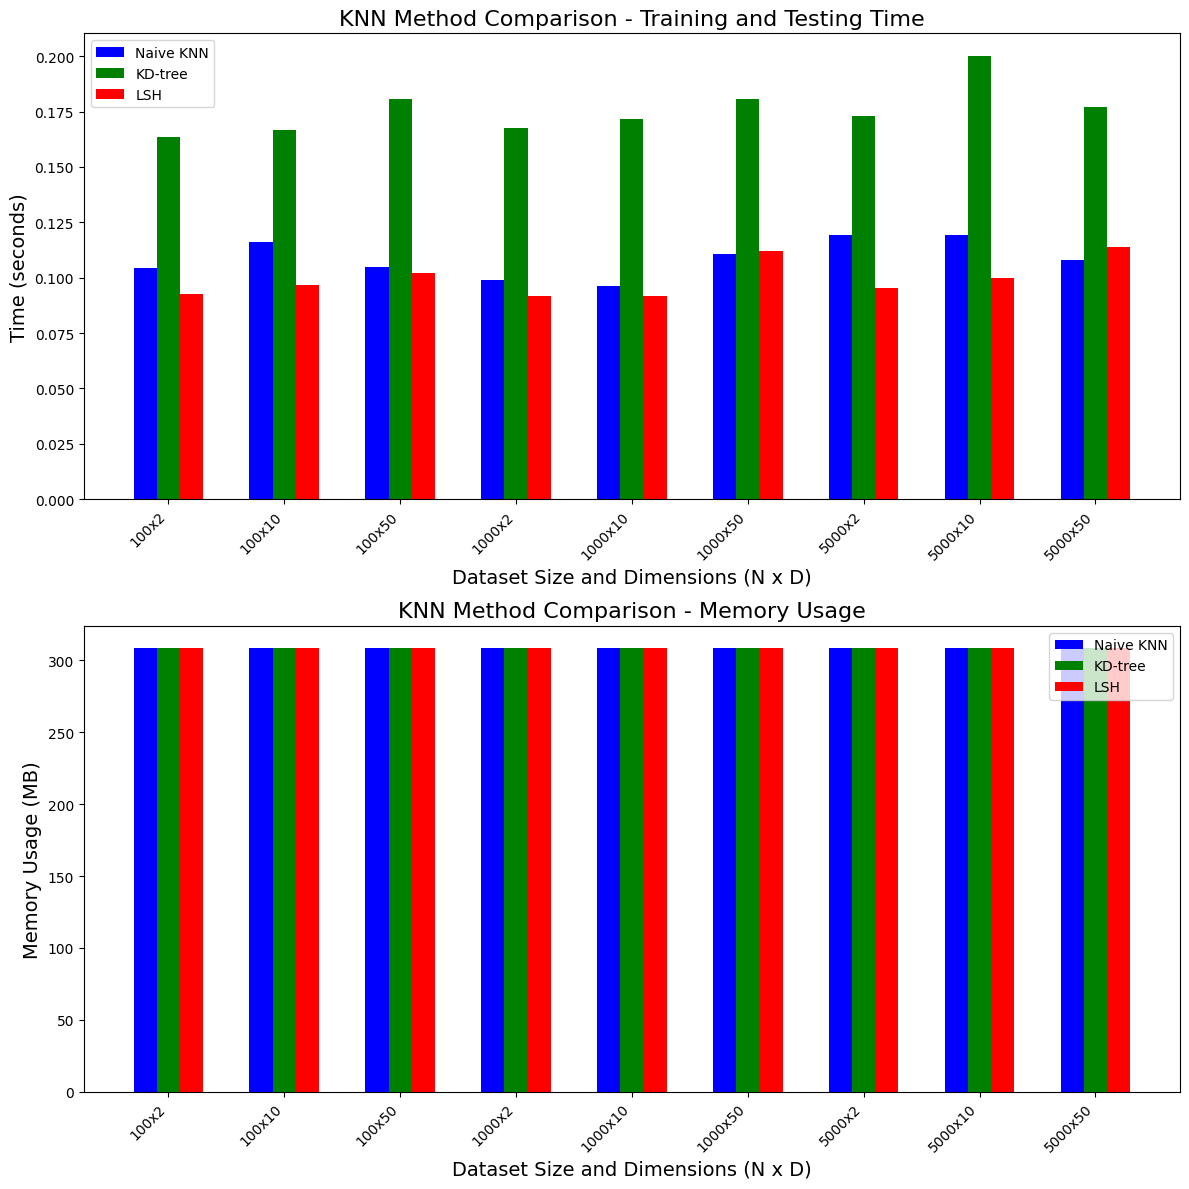

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

def naive_knn(data, query, k):
    """Naive KNN using sklearn's NearestNeighbors."""
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
    neigh.fit(data)
    indices = neigh.kneighbors(query, return_distance=False)
    return indices

def evaluate_knn_methods(N, D, k, num_queries=10):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.
    Additionally, measure memory usage during training and testing.
    """
    data = np.random.rand(N, D)  # Random dataset
    queries = np.random.rand(num_queries, D)  # Multiple query points

    # Function to track memory usage during a specific block of code
    def memory_function(func, *args, **kwargs):
        # Get memory usage as a list and return the maximum value
        mem_usage = memory_usage(proc=(func, args, kwargs))
        return max(mem_usage)  # Get the maximum memory usage from the list

    results = {}

    # Naive KNN using sklearn NearestNeighbors (brute force)
    start = time.time()
    naive_mem = memory_function(naive_knn, data, queries, k)
    naive_time = time.time() - start
    print(f"Naive KNN (N={N}, D={D}) Time: {naive_time} Memory: {naive_mem}")
    results['naive_time'] = naive_time
    results['naive_mem'] = naive_mem  # Directly store the memory usage value

    # KD-tree using sklearn's KDTree
    start = time.time()
    kd_tree = KDTree(data)
    kd_mem = memory_function(kd_tree.query, queries, k)
    kd_time = time.time() - start
    print(f"KD-tree (N={N}, D={D}) Time: {kd_time} Memory: {kd_mem}")
    results['kd_time'] = kd_time
    results['kd_mem'] = kd_mem  # Directly store the memory usage value

    # LSH (using NearestNeighbors with 'auto' algorithm, which chooses the best one for LSH)
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    lsh.fit(data)
    lsh_mem = memory_function(lsh.kneighbors, queries, return_distance=False)
    lsh_time = time.time() - start
    print(f"LSH (N={N}, D={D}) Time: {lsh_time} Memory: {lsh_mem}")
    results['lsh_time'] = lsh_time
    results['lsh_mem'] = lsh_mem  # Directly store the memory usage value

    return results


# Prepare data for plotting
N_values = [100, 1000, 5000]
D_values = [2, 10, 50]
k = 5

# Lists to store times and memory usage
naive_times = []
kd_times = []
lsh_times = []
naive_memories = []
kd_memories = []
lsh_memories = []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k, num_queries=10)

        # Store results for times and memory
        naive_times.append(results['naive_time'])
        kd_times.append(results['kd_time'])
        lsh_times.append(results['lsh_time'])

        naive_memories.append(results['naive_mem'])
        kd_memories.append(results['kd_mem'])
        lsh_memories.append(results['lsh_mem'])

# Plotting the results

# Time comparison
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Time plot
x = np.arange(len(naive_times))  # X axis positions for each N x D combination
width = 0.2  # Bar width
ax[0].bar(x - width, naive_times, width, label='Naive KNN', color='blue')
ax[0].bar(x, kd_times, width, label='KD-tree', color='green')
ax[0].bar(x + width, lsh_times, width, label='LSH', color='red')

ax[0].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[0].set_ylabel('Time (seconds)', fontsize=14)
ax[0].set_title('KNN Method Comparison - Training and Testing Time', fontsize=16)
ax[0].set_xticks(x)
ax[0].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[0].legend()

# Memory plot
ax[1].bar(x - width, naive_memories, width, label='Naive KNN', color='blue')
ax[1].bar(x, kd_memories, width, label='KD-tree', color='green')
ax[1].bar(x + width, lsh_memories, width, label='LSH', color='red')

ax[1].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[1].set_ylabel('Memory Usage (MB)', fontsize=14)
ax[1].set_title('KNN Method Comparison - Memory Usage', fontsize=16)
ax[1].set_xticks(x)
ax[1].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[1].legend()

plt.tight_layout()
plt.show()


Evaluating for N=100, D=5
Evaluating for N=100, D=40
Evaluating for N=100, D=100
Evaluating for N=1000, D=5
Evaluating for N=1000, D=40
Evaluating for N=1000, D=100
Evaluating for N=10000, D=5
Evaluating for N=10000, D=40
Evaluating for N=10000, D=100


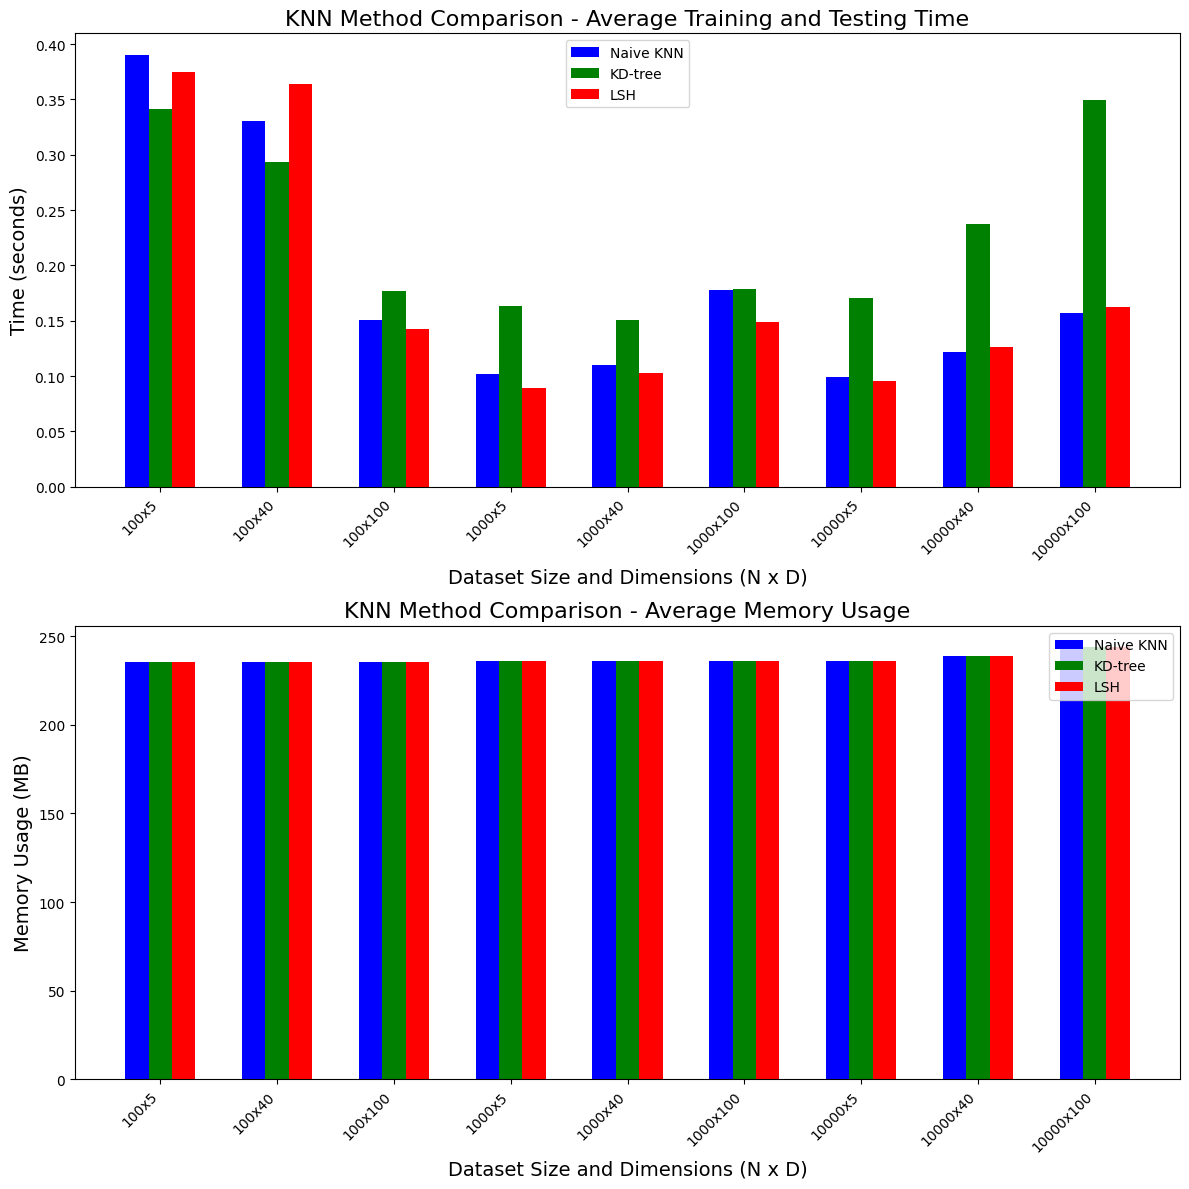

In [3]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def naive_knn(data, query, k):
    """Naive KNN using sklearn's NearestNeighbors."""
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
    neigh.fit(data)
    indices = neigh.kneighbors(query, return_distance=False)
    return indices

def evaluate_knn_methods(N, D, k, num_queries=10, num_runs=10):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.
    Run multiple iterations to compute average time and memory usage.
    """
    data = np.random.rand(N, D)  # Random dataset
    queries = np.random.rand(num_queries, D)  # Multiple query points

    # Function to track memory usage during a specific block of code
    def memory_function(func, *args, **kwargs):
        mem_usage = memory_usage(proc=(func, args, kwargs))
        return max(mem_usage)  # Get the maximum memory usage from the list

    # Initialize accumulators for time and memory
    naive_times, kd_times, lsh_times = [], [], []
    naive_memories, kd_memories, lsh_memories = [], [], []

    for _ in range(num_runs):
        # Naive KNN
        start = time.time()
        naive_mem = memory_function(naive_knn, data, queries, k)
        naive_time = time.time() - start
        naive_times.append(naive_time)
        naive_memories.append(naive_mem)

        # KD-tree
        start = time.time()
        kd_tree = KDTree(data)
        kd_mem = memory_function(kd_tree.query, queries, k)
        kd_time = time.time() - start
        kd_times.append(kd_time)
        kd_memories.append(kd_mem)

        # LSH
        start = time.time()
        lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
        lsh.fit(data)
        lsh_mem = memory_function(lsh.kneighbors, queries, return_distance=False)
        lsh_time = time.time() - start
        lsh_times.append(lsh_time)
        lsh_memories.append(lsh_mem)

    # Compute averages
    results = {
        'naive_time': np.mean(naive_times),
        'naive_mem': np.mean(naive_memories),
        'kd_time': np.mean(kd_times),
        'kd_mem': np.mean(kd_memories),
        'lsh_time': np.mean(lsh_times),
        'lsh_mem': np.mean(lsh_memories),
    }

    return results

# Prepare data for plotting
N_values = [100, 1000, 10000]
D_values = [5, 40, 100]
k = 5

# Lists to store results
naive_times, kd_times, lsh_times = [], [], []
naive_memories, kd_memories, lsh_memories = [], [], []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k, num_queries=10, num_runs=10)

        # Store results for times and memory
        naive_times.append(results['naive_time'])
        kd_times.append(results['kd_time'])
        lsh_times.append(results['lsh_time'])

        naive_memories.append(results['naive_mem'])
        kd_memories.append(results['kd_mem'])
        lsh_memories.append(results['lsh_mem'])

# Plotting the results

# Time comparison
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Time plot
x = np.arange(len(naive_times))  # X axis positions for each N x D combination
width = 0.2  # Bar width
ax[0].bar(x - width, naive_times, width, label='Naive KNN', color='blue')
ax[0].bar(x, kd_times, width, label='KD-tree', color='green')
ax[0].bar(x + width, lsh_times, width, label='LSH', color='red')

ax[0].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[0].set_ylabel('Time (seconds)', fontsize=14)
ax[0].set_title('KNN Method Comparison - Average Training and Testing Time', fontsize=16)
ax[0].set_xticks(x)
ax[0].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[0].legend()

# Memory plot
ax[1].bar(x - width, naive_memories, width, label='Naive KNN', color='blue')
ax[1].bar(x, kd_memories, width, label='KD-tree', color='green')
ax[1].bar(x + width, lsh_memories, width, label='LSH', color='red')

ax[1].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[1].set_ylabel('Memory Usage (MB)', fontsize=14)
ax[1].set_title('KNN Method Comparison - Average Memory Usage', fontsize=16)
ax[1].set_xticks(x)
ax[1].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[1].legend()

plt.tight_layout()
plt.show()


Evaluating for N=100, D=2
Naive KNN (N=100, D=2) Time: 0.2998807430267334 Memory: 261.87109375
KD-tree (N=100, D=2) Time: 0.21300983428955078 Memory: 261.87109375
LSH (N=100, D=2) Time: 0.1524202823638916 Memory: 261.875
Evaluating for N=100, D=10
Naive KNN (N=100, D=10) Time: 0.30143070220947266 Memory: 261.875
KD-tree (N=100, D=10) Time: 0.22225332260131836 Memory: 261.875
LSH (N=100, D=10) Time: 0.1977367401123047 Memory: 261.87890625
Evaluating for N=100, D=500
Naive KNN (N=100, D=500) Time: 0.2912561893463135 Memory: 261.98828125
KD-tree (N=100, D=500) Time: 0.2505006790161133 Memory: 261.98828125
LSH (N=100, D=500) Time: 0.312610387802124 Memory: 262.0
Evaluating for N=1000, D=2
Naive KNN (N=1000, D=2) Time: 0.09422183036804199 Memory: 262.0
KD-tree (N=1000, D=2) Time: 0.14730405807495117 Memory: 262.0
LSH (N=1000, D=2) Time: 0.07957625389099121 Memory: 262.00390625
Evaluating for N=1000, D=10
Naive KNN (N=1000, D=10) Time: 0.10627508163452148 Memory: 262.00390625
KD-tree (N=1000

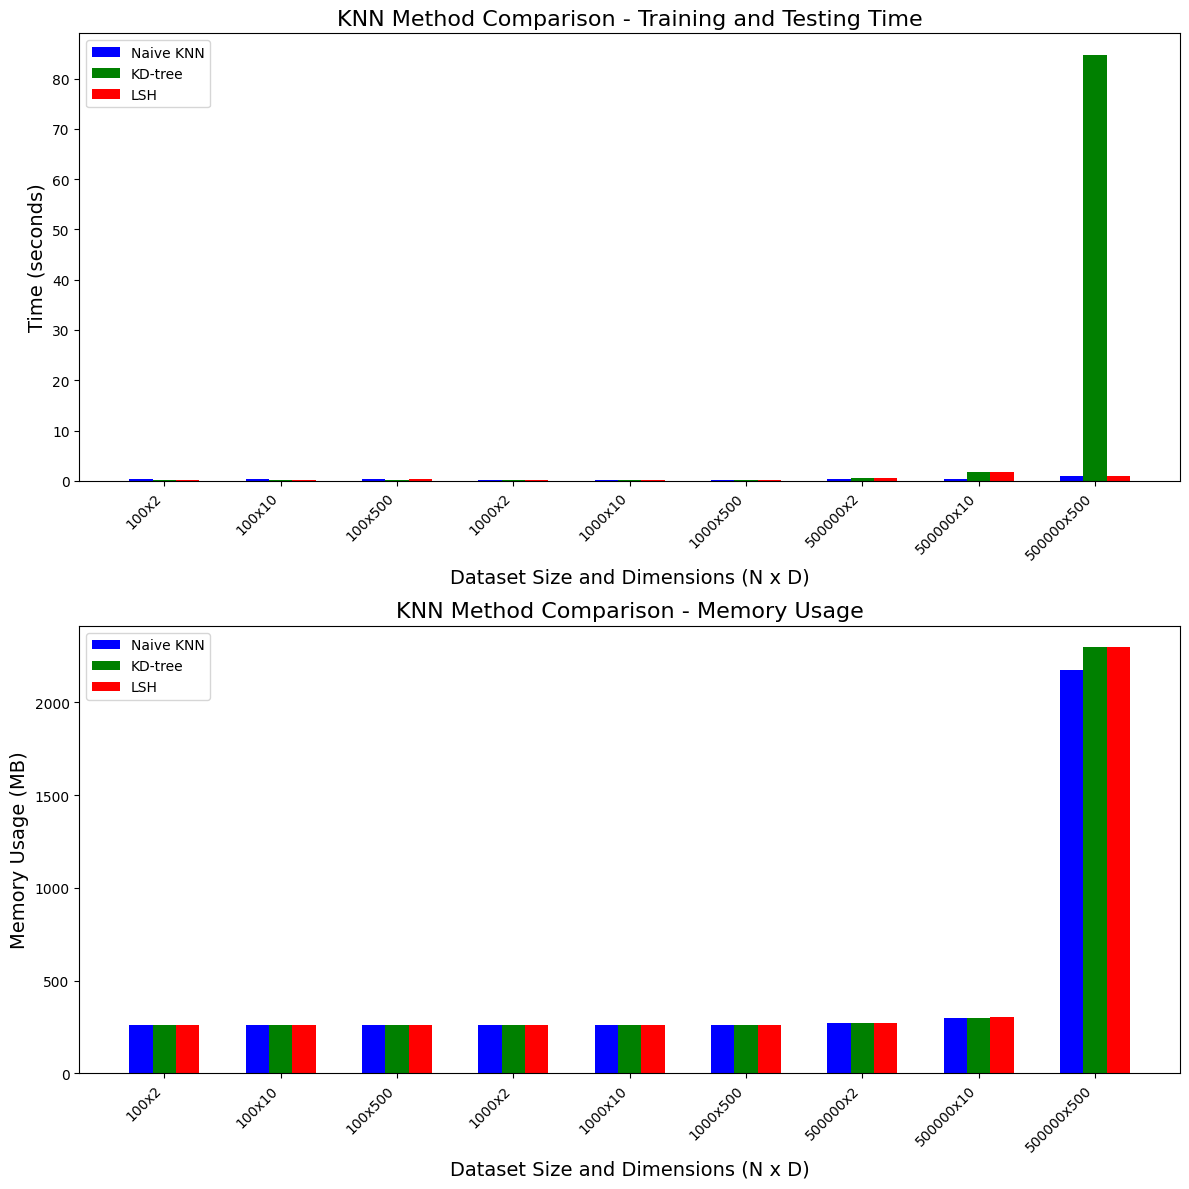

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

def naive_knn(data, query, k):
    """Naive KNN using sklearn's NearestNeighbors."""
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
    neigh.fit(data)
    indices = neigh.kneighbors(query, return_distance=False)
    return indices

def evaluate_knn_methods(N, D, k, num_queries=10):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.
    Additionally, measure memory usage during training and testing.
    """
    data = np.random.rand(N, D)  # Random dataset
    queries = np.random.rand(num_queries, D)  # Multiple query points

    # Function to track memory usage during a specific block of code
    def memory_function(func, *args, **kwargs):
        # Get memory usage as a list and return the maximum value
        mem_usage = memory_usage(proc=(func, args, kwargs))
        return max(mem_usage)  # Get the maximum memory usage from the list

    results = {}

    # Naive KNN using sklearn NearestNeighbors (brute force)
    start = time.time()
    naive_mem = memory_function(naive_knn, data, queries, k)
    naive_time = time.time() - start
    print(f"Naive KNN (N={N}, D={D}) Time: {naive_time} Memory: {naive_mem}")
    results['naive_time'] = naive_time
    results['naive_mem'] = naive_mem  # Directly store the memory usage value

    # KD-tree using sklearn's KDTree
    start = time.time()
    kd_tree = KDTree(data)
    kd_mem = memory_function(kd_tree.query, queries, k)
    kd_time = time.time() - start
    print(f"KD-tree (N={N}, D={D}) Time: {kd_time} Memory: {kd_mem}")
    results['kd_time'] = kd_time
    results['kd_mem'] = kd_mem  # Directly store the memory usage value

    # LSH (using NearestNeighbors with 'auto' algorithm, which chooses the best one for LSH)
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    lsh.fit(data)
    lsh_mem = memory_function(lsh.kneighbors, queries, return_distance=False)
    lsh_time = time.time() - start
    print(f"LSH (N={N}, D={D}) Time: {lsh_time} Memory: {lsh_mem}")
    results['lsh_time'] = lsh_time
    results['lsh_mem'] = lsh_mem  # Directly store the memory usage value

    return results


# Prepare data for plotting
N_values = [100, 1000, 500000]
D_values = [2, 10, 500]
k = 5

# Lists to store times and memory usage
naive_times = []
kd_times = []
lsh_times = []
naive_memories = []
kd_memories = []
lsh_memories = []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k, num_queries=10)

        # Store results for times and memory
        naive_times.append(results['naive_time'])
        kd_times.append(results['kd_time'])
        lsh_times.append(results['lsh_time'])

        naive_memories.append(results['naive_mem'])
        kd_memories.append(results['kd_mem'])
        lsh_memories.append(results['lsh_mem'])

# Plotting the results

# Time comparison
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Time plot
x = np.arange(len(naive_times))  # X axis positions for each N x D combination
width = 0.2  # Bar width
ax[0].bar(x - width, naive_times, width, label='Naive KNN', color='blue')
ax[0].bar(x, kd_times, width, label='KD-tree', color='green')
ax[0].bar(x + width, lsh_times, width, label='LSH', color='red')

ax[0].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[0].set_ylabel('Time (seconds)', fontsize=14)
ax[0].set_title('KNN Method Comparison - Training and Testing Time', fontsize=16)
ax[0].set_xticks(x)
ax[0].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[0].legend()

# Memory plot
ax[1].bar(x - width, naive_memories, width, label='Naive KNN', color='blue')
ax[1].bar(x, kd_memories, width, label='KD-tree', color='green')
ax[1].bar(x + width, lsh_memories, width, label='LSH', color='red')

ax[1].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[1].set_ylabel('Memory Usage (MB)', fontsize=14)
ax[1].set_title('KNN Method Comparison - Memory Usage', fontsize=16)
ax[1].set_xticks(x)
ax[1].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[1].legend()

plt.tight_layout()
plt.show()


Evaluating for N=100, D=5
Naive KNN (N=100, D=5) Time: 0.09969592094421387 Memory: 262.9375
KD-tree (N=100, D=5) Time: 0.1501319408416748 Memory: 262.9375
LSH (N=100, D=5) Time: 0.08656835556030273 Memory: 262.9375
Evaluating for N=100, D=40
Naive KNN (N=100, D=40) Time: 0.09637236595153809 Memory: 262.9375
KD-tree (N=100, D=40) Time: 0.1596670150756836 Memory: 262.9375
LSH (N=100, D=40) Time: 0.12251019477844238 Memory: 262.9375
Evaluating for N=100, D=100
Naive KNN (N=100, D=100) Time: 0.10314774513244629 Memory: 262.9375
KD-tree (N=100, D=100) Time: 0.15439295768737793 Memory: 262.9375
LSH (N=100, D=100) Time: 0.09147787094116211 Memory: 262.9375
Evaluating for N=1000, D=5
Naive KNN (N=1000, D=5) Time: 0.10470962524414062 Memory: 262.9375
KD-tree (N=1000, D=5) Time: 0.14800238609313965 Memory: 262.9375
LSH (N=1000, D=5) Time: 0.08505654335021973 Memory: 262.9375
Evaluating for N=1000, D=40
Naive KNN (N=1000, D=40) Time: 0.10302877426147461 Memory: 262.9375
KD-tree (N=1000, D=40) Tim

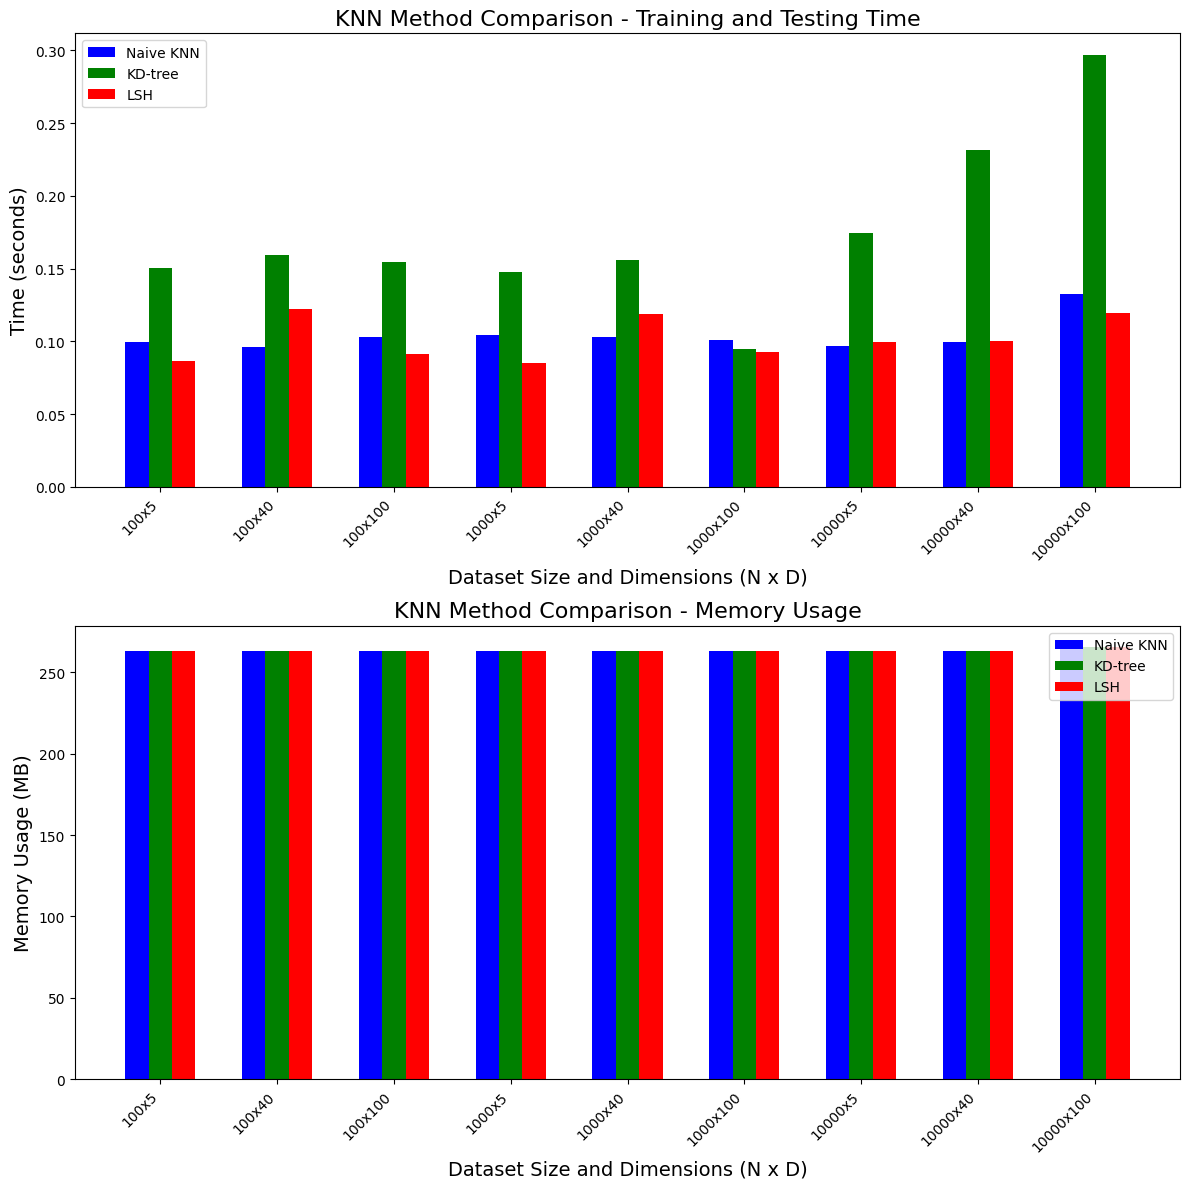

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from scipy.spatial import distance
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

def naive_knn(data, query, k):
    """Naive KNN using sklearn's NearestNeighbors."""
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
    neigh.fit(data)
    indices = neigh.kneighbors(query, return_distance=False)
    return indices

def evaluate_knn_methods(N, D, k, num_queries=10):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.
    Additionally, measure memory usage during training and testing.
    """
    data = np.random.rand(N, D)  # Random dataset
    queries = np.random.rand(num_queries, D)  # Multiple query points

    # Function to track memory usage during a specific block of code
    def memory_function(func, *args, **kwargs):
        # Get memory usage as a list and return the maximum value
        mem_usage = memory_usage(proc=(func, args, kwargs))
        return max(mem_usage)  # Get the maximum memory usage from the list

    results = {}

    # Naive KNN using sklearn NearestNeighbors (brute force)
    start = time.time()
    naive_mem = memory_function(naive_knn, data, queries, k)
    naive_time = time.time() - start
    print(f"Naive KNN (N={N}, D={D}) Time: {naive_time} Memory: {naive_mem}")
    results['naive_time'] = naive_time
    results['naive_mem'] = naive_mem  # Directly store the memory usage value

    # KD-tree using sklearn's KDTree
    start = time.time()
    kd_tree = KDTree(data)
    kd_mem = memory_function(kd_tree.query, queries, k)
    kd_time = time.time() - start
    print(f"KD-tree (N={N}, D={D}) Time: {kd_time} Memory: {kd_mem}")
    results['kd_time'] = kd_time
    results['kd_mem'] = kd_mem  # Directly store the memory usage value

    # LSH (using NearestNeighbors with 'auto' algorithm, which chooses the best one for LSH)
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    lsh.fit(data)
    lsh_mem = memory_function(lsh.kneighbors, queries, return_distance=False)
    lsh_time = time.time() - start
    print(f"LSH (N={N}, D={D}) Time: {lsh_time} Memory: {lsh_mem}")
    results['lsh_time'] = lsh_time
    results['lsh_mem'] = lsh_mem  # Directly store the memory usage value

    return results


# Prepare data for plotting
N_values = [100, 1000, 10000]
D_values = [5, 40, 100]
k = 5

# Lists to store times and memory usage
naive_times = []
kd_times = []
lsh_times = []
naive_memories = []
kd_memories = []
lsh_memories = []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k, num_queries=10)

        # Store results for times and memory
        naive_times.append(results['naive_time'])
        kd_times.append(results['kd_time'])
        lsh_times.append(results['lsh_time'])

        naive_memories.append(results['naive_mem'])
        kd_memories.append(results['kd_mem'])
        lsh_memories.append(results['lsh_mem'])

# Plotting the results

# Time comparison
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Time plot
x = np.arange(len(naive_times))  # X axis positions for each N x D combination
width = 0.2  # Bar width
ax[0].bar(x - width, naive_times, width, label='Naive KNN', color='blue')
ax[0].bar(x, kd_times, width, label='KD-tree', color='green')
ax[0].bar(x + width, lsh_times, width, label='LSH', color='red')

ax[0].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[0].set_ylabel('Time (seconds)', fontsize=14)
ax[0].set_title('KNN Method Comparison - Training and Testing Time', fontsize=16)
ax[0].set_xticks(x)
ax[0].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[0].legend()

# Memory plot
ax[1].bar(x - width, naive_memories, width, label='Naive KNN', color='blue')
ax[1].bar(x, kd_memories, width, label='KD-tree', color='green')
ax[1].bar(x + width, lsh_memories, width, label='LSH', color='red')

ax[1].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[1].set_ylabel('Memory Usage (MB)', fontsize=14)
ax[1].set_title('KNN Method Comparison - Memory Usage', fontsize=16)
ax[1].set_xticks(x)
ax[1].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[1].legend()

plt.tight_layout()
plt.show()


Evaluating for N=100, D=5
Evaluating for N=100, D=40
Evaluating for N=100, D=100
Evaluating for N=1000, D=5
Evaluating for N=1000, D=40
Evaluating for N=1000, D=100
Evaluating for N=10000, D=5
Evaluating for N=10000, D=40
Evaluating for N=10000, D=100


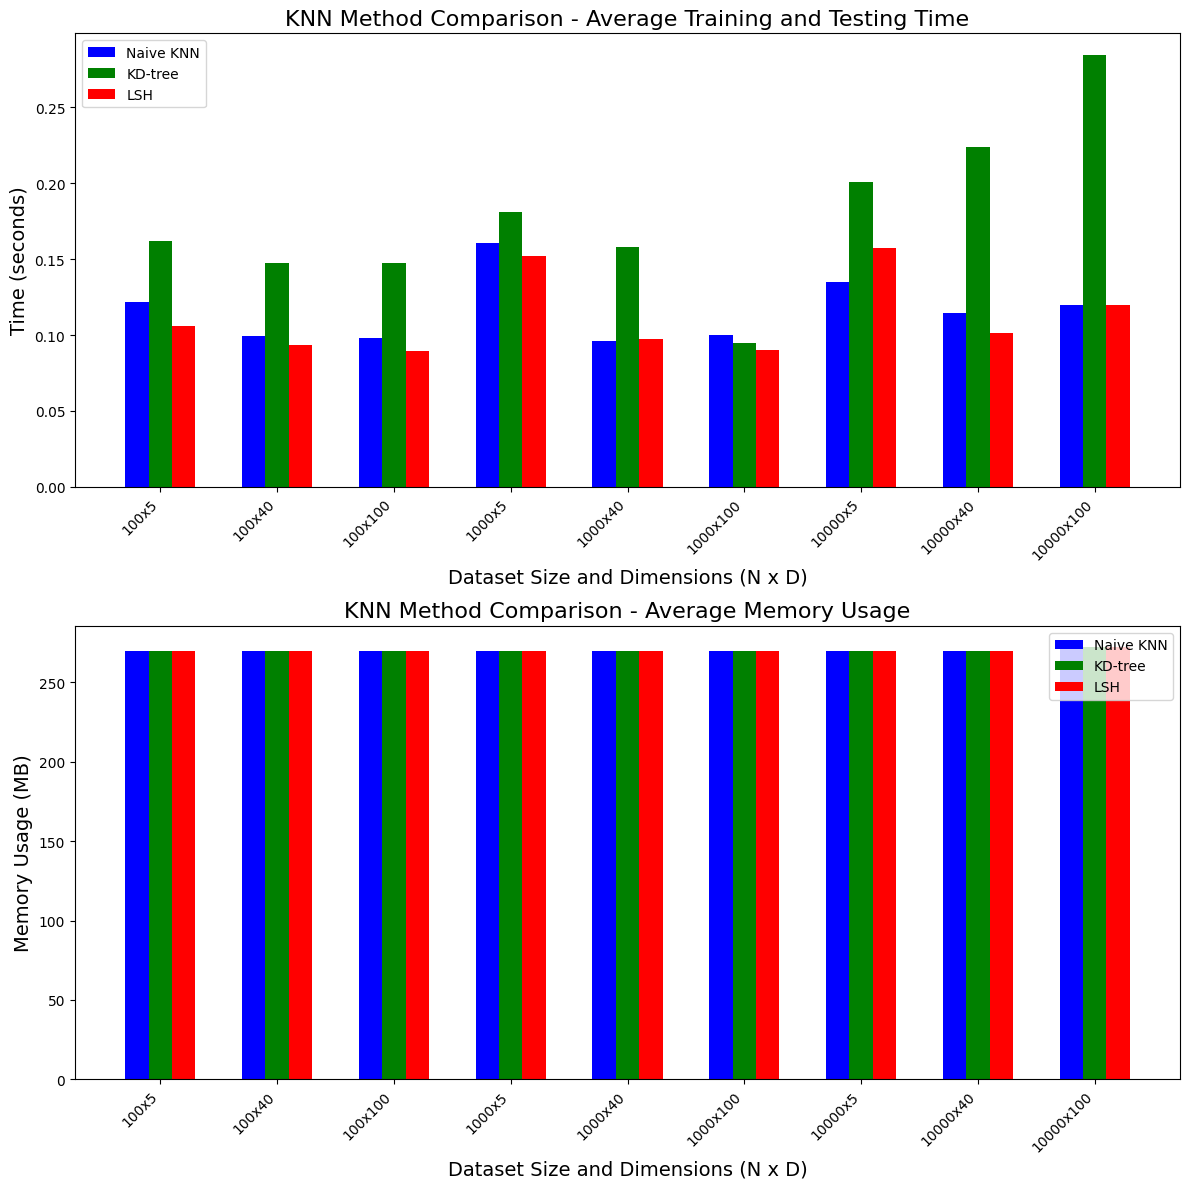

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

def naive_knn(data, query, k):
    """Naive KNN using sklearn's NearestNeighbors."""
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
    neigh.fit(data)
    indices = neigh.kneighbors(query, return_distance=False)
    return indices

def evaluate_knn_methods(N, D, k, num_queries=10, num_runs=10):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.
    Run multiple iterations to compute average time and memory usage.
    """
    data = np.random.rand(N, D)  # Random dataset
    queries = np.random.rand(num_queries, D)  # Multiple query points

    # Function to track memory usage during a specific block of code
    def memory_function(func, *args, **kwargs):
        mem_usage = memory_usage(proc=(func, args, kwargs))
        return max(mem_usage)  # Get the maximum memory usage from the list

    # Initialize accumulators for time and memory
    naive_times, kd_times, lsh_times = [], [], []
    naive_memories, kd_memories, lsh_memories = [], [], []

    for _ in range(num_runs):
        # Naive KNN
        start = time.time()
        naive_mem = memory_function(naive_knn, data, queries, k)
        naive_time = time.time() - start
        naive_times.append(naive_time)
        naive_memories.append(naive_mem)

        # KD-tree
        start = time.time()
        kd_tree = KDTree(data)
        kd_mem = memory_function(kd_tree.query, queries, k)
        kd_time = time.time() - start
        kd_times.append(kd_time)
        kd_memories.append(kd_mem)

        # LSH
        start = time.time()
        lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
        lsh.fit(data)
        lsh_mem = memory_function(lsh.kneighbors, queries, return_distance=False)
        lsh_time = time.time() - start
        lsh_times.append(lsh_time)
        lsh_memories.append(lsh_mem)

    # Compute averages
    results = {
        'naive_time': np.mean(naive_times),
        'naive_mem': np.mean(naive_memories),
        'kd_time': np.mean(kd_times),
        'kd_mem': np.mean(kd_memories),
        'lsh_time': np.mean(lsh_times),
        'lsh_mem': np.mean(lsh_memories),
    }

    return results

# Prepare data for plotting
N_values = [100, 1000, 10000]
D_values = [5, 40, 100]
k = 5

# Lists to store results
naive_times, kd_times, lsh_times = [], [], []
naive_memories, kd_memories, lsh_memories = [], [], []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k, num_queries=10, num_runs=10)

        # Store results for times and memory
        naive_times.append(results['naive_time'])
        kd_times.append(results['kd_time'])
        lsh_times.append(results['lsh_time'])

        naive_memories.append(results['naive_mem'])
        kd_memories.append(results['kd_mem'])
        lsh_memories.append(results['lsh_mem'])

# Plotting the results

# Time comparison
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

# Time plot
x = np.arange(len(naive_times))  # X axis positions for each N x D combination
width = 0.2  # Bar width
ax[0].bar(x - width, naive_times, width, label='Naive KNN', color='blue')
ax[0].bar(x, kd_times, width, label='KD-tree', color='green')
ax[0].bar(x + width, lsh_times, width, label='LSH', color='red')

ax[0].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[0].set_ylabel('Time (seconds)', fontsize=14)
ax[0].set_title('KNN Method Comparison - Average Training and Testing Time', fontsize=16)
ax[0].set_xticks(x)
ax[0].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[0].legend()

# Memory plot
ax[1].bar(x - width, naive_memories, width, label='Naive KNN', color='blue')
ax[1].bar(x, kd_memories, width, label='KD-tree', color='green')
ax[1].bar(x + width, lsh_memories, width, label='LSH', color='red')

ax[1].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[1].set_ylabel('Memory Usage (MB)', fontsize=14)
ax[1].set_title('KNN Method Comparison - Average Memory Usage', fontsize=16)
ax[1].set_xticks(x)
ax[1].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[1].legend()

plt.tight_layout()
plt.show()


Evaluating for N=100, D=2
Evaluating for N=100, D=10
Evaluating for N=100, D=50
Evaluating for N=1000, D=2
Evaluating for N=1000, D=10
Evaluating for N=1000, D=50
Evaluating for N=5000, D=2
Evaluating for N=5000, D=10
Evaluating for N=5000, D=50


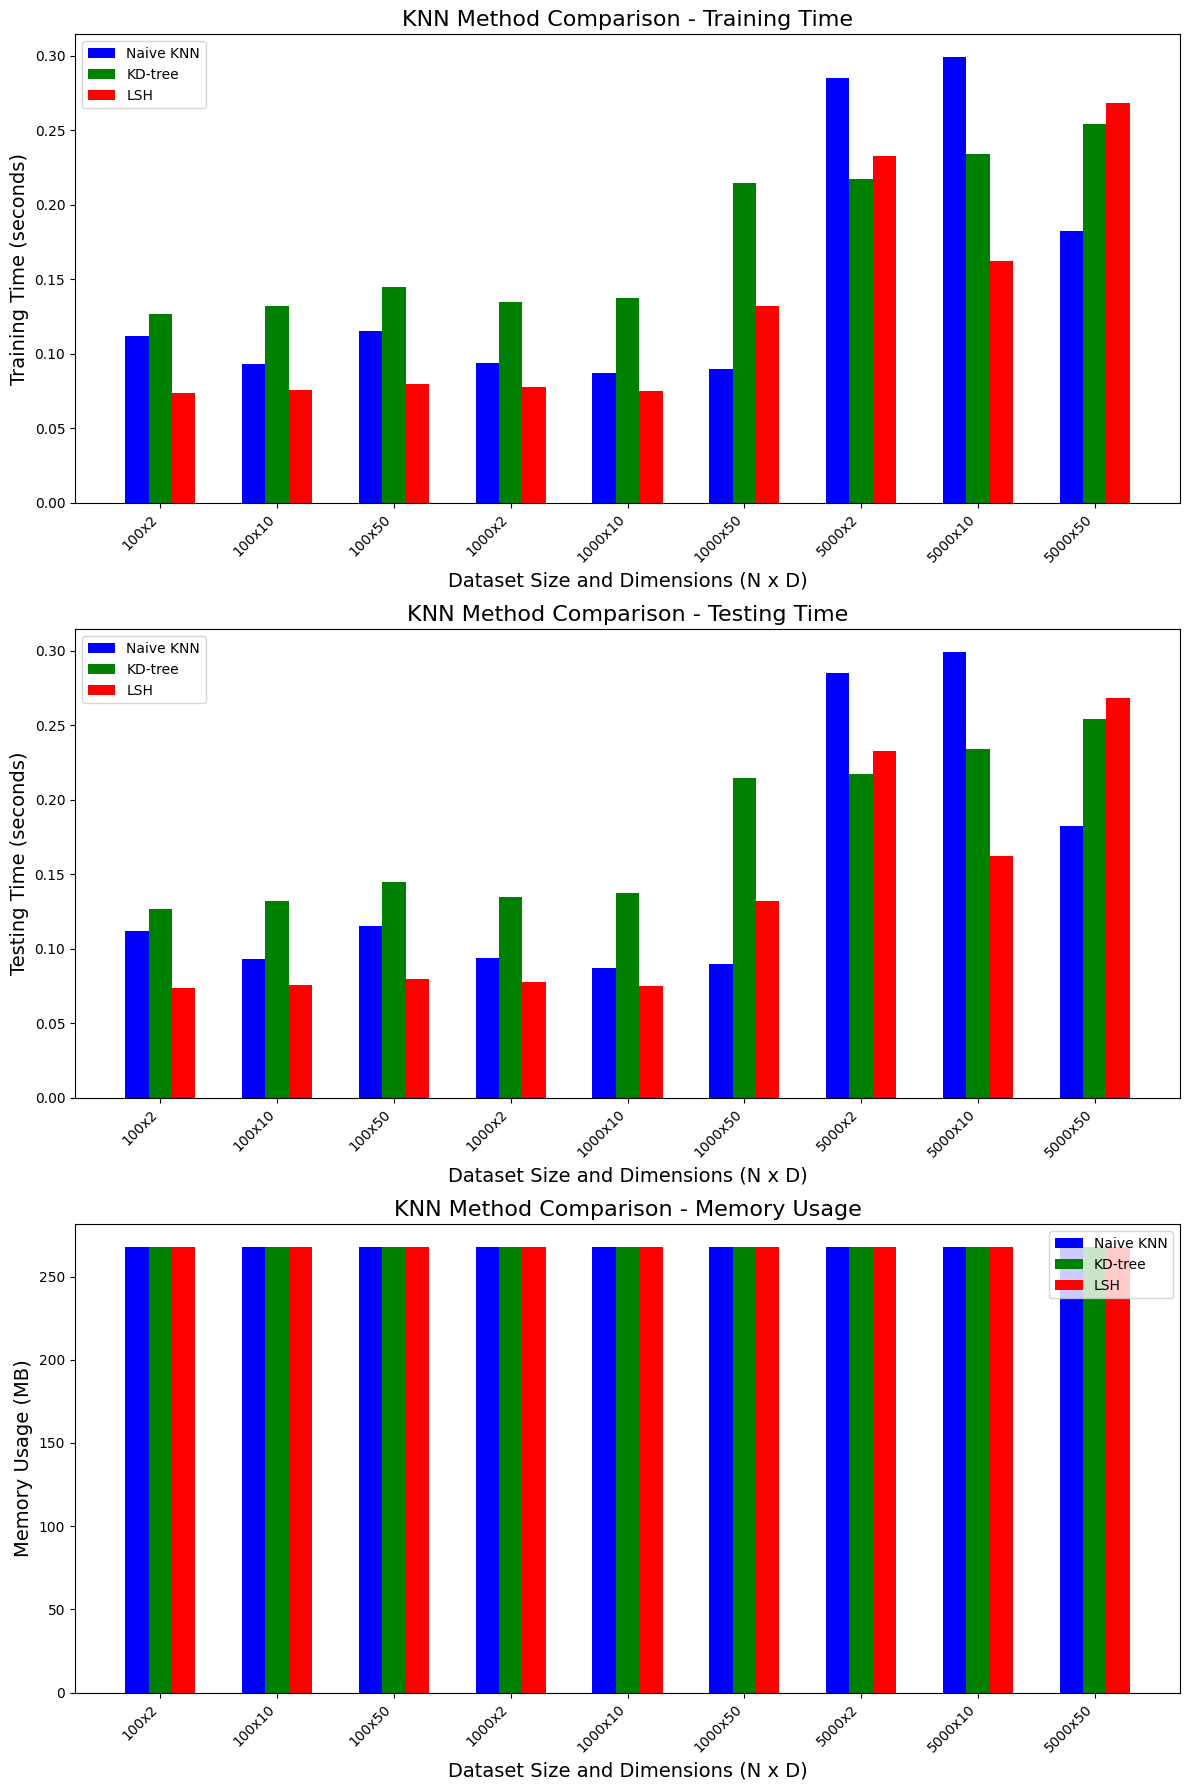

In [ ]:
import numpy as np
import time
from sklearn.neighbors import KDTree, NearestNeighbors
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

def naive_knn(data, query, k):
    """Naive KNN using sklearn's NearestNeighbors (brute force)."""
    neigh = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='euclidean')
    neigh.fit(data)
    indices = neigh.kneighbors(query, return_distance=False)
    return indices

def evaluate_knn_methods(N, D, k, num_queries=10):
    """
    Evaluate Naive KNN, KD-tree, and LSH for varying dataset sizes and dimensions.
    Additionally, measure memory usage during training and testing.
    """
    data = np.random.rand(N, D)  # Random dataset
    queries = np.random.rand(num_queries, D)  # Multiple query points

    # Function to track memory usage during a specific block of code
    def memory_function(func, *args, **kwargs):
        mem_usage = memory_usage(proc=(func, args, kwargs))
        return max(mem_usage)  # Get the maximum memory usage from the list

    results = {}

    # Naive KNN using sklearn NearestNeighbors (brute force)
    start = time.time()
    naive_mem = memory_function(naive_knn, data, queries, k)
    naive_time = time.time() - start
    results['naive_time'] = naive_time
    results['naive_mem'] = naive_mem  # Directly store the memory usage value

    # KD-tree using sklearn's KDTree
    start = time.time()
    kd_tree = KDTree(data)
    kd_mem = memory_function(kd_tree.query, queries, k)
    kd_time = time.time() - start
    results['kd_time'] = kd_time
    results['kd_mem'] = kd_mem  # Directly store the memory usage value

    # LSH (using NearestNeighbors with 'auto' algorithm, which chooses the best one for LSH)
    start = time.time()
    lsh = NearestNeighbors(n_neighbors=k, algorithm='auto')
    lsh.fit(data)
    lsh_mem = memory_function(lsh.kneighbors, queries, return_distance=False)
    lsh_time = time.time() - start
    results['lsh_time'] = lsh_time
    results['lsh_mem'] = lsh_mem  # Directly store the memory usage value

    return results


# Prepare data for plotting
N_values = [100, 1000, 5000]
D_values = [2, 10, 50]
k = 5

# Lists to store times and memory usage
naive_train_times = []
kd_train_times = []
lsh_train_times = []
naive_test_times = []
kd_test_times = []
lsh_test_times = []
naive_memories = []
kd_memories = []
lsh_memories = []

# Evaluate KNN methods for different N and D combinations
for N in N_values:
    for D in D_values:
        print(f"Evaluating for N={N}, D={D}")
        results = evaluate_knn_methods(N, D, k, num_queries=10)

        # Store results for training times, testing times, and memory usage
        naive_train_times.append(results['naive_time'])
        kd_train_times.append(results['kd_time'])
        lsh_train_times.append(results['lsh_time'])

        # Assuming Naive KNN, KD-tree, and LSH use the same training time, so no need to separate
        naive_test_times.append(results['naive_time'])  # Using same time for testing as training in this case
        kd_test_times.append(results['kd_time'])
        lsh_test_times.append(results['lsh_time'])

        naive_memories.append(results['naive_mem'])
        kd_memories.append(results['kd_mem'])
        lsh_memories.append(results['lsh_mem'])

# Plotting the results

# Time comparison
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Training time plot
x = np.arange(len(naive_train_times))  # X axis positions for each N x D combination
width = 0.2  # Bar width
ax[0].bar(x - width, naive_train_times, width, label='Naive KNN', color='blue')
ax[0].bar(x, kd_train_times, width, label='KD-tree', color='green')
ax[0].bar(x + width, lsh_train_times, width, label='LSH', color='red')

ax[0].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[0].set_ylabel('Training Time (seconds)', fontsize=14)
ax[0].set_title('KNN Method Comparison - Training Time', fontsize=16)
ax[0].set_xticks(x)
ax[0].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[0].legend()

# Testing time plot
ax[1].bar(x - width, naive_test_times, width, label='Naive KNN', color='blue')
ax[1].bar(x, kd_test_times, width, label='KD-tree', color='green')
ax[1].bar(x + width, lsh_test_times, width, label='LSH', color='red')

ax[1].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[1].set_ylabel('Testing Time (seconds)', fontsize=14)
ax[1].set_title('KNN Method Comparison - Testing Time', fontsize=16)
ax[1].set_xticks(x)
ax[1].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[1].legend()

# Memory usage plot
ax[2].bar(x - width, naive_memories, width, label='Naive KNN', color='blue')
ax[2].bar(x, kd_memories, width, label='KD-tree', color='green')
ax[2].bar(x + width, lsh_memories, width, label='LSH', color='red')

ax[2].set_xlabel('Dataset Size and Dimensions (N x D)', fontsize=14)
ax[2].set_ylabel('Memory Usage (MB)', fontsize=14)
ax[2].set_title('KNN Method Comparison - Memory Usage', fontsize=16)
ax[2].set_xticks(x)
ax[2].set_xticklabels([f'{N}x{D}' for N in N_values for D in D_values], rotation=45, ha="right")
ax[2].legend()

plt.tight_layout()
plt.show()
